# Loading data

In [0]:
import sklearn.datasets
import numpy as np

In [0]:
br_canc = sklearn.datasets.load_breast_cancer()

In [0]:
X = br_canc.data
Y = br_canc.target

In [4]:
print(X.shape)

(569, 30)


In [5]:
import pandas as pd
data = pd.DataFrame(br_canc.data,columns=br_canc.feature_names)
data.head()
data['class'] = br_canc.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
data.groupby('class').count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
1,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357


#Splitting data to train and test

In [0]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop('class',axis = 1)
Y = data['class']
XTrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size = .3, stratify = Y, random_state = 1)
print(X.shape, XTrain.shape)

(569, 30) (398, 30)


#MP Nueron

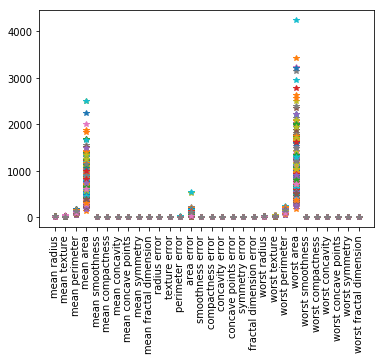

In [10]:
import matplotlib.pyplot as plt
plt.plot(XTrain.T,'*')
plt.xticks(rotation='vertical')
plt.show()

#Binarisation

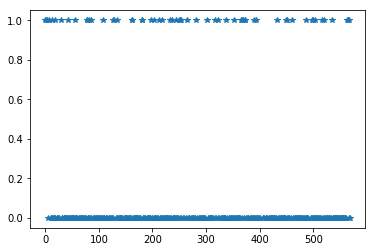

In [11]:
X_bin = XTrain['mean area'].map(lambda x : 0 if(x < 1000) else 1)
plt.plot(X_bin,'*')
plt.show()

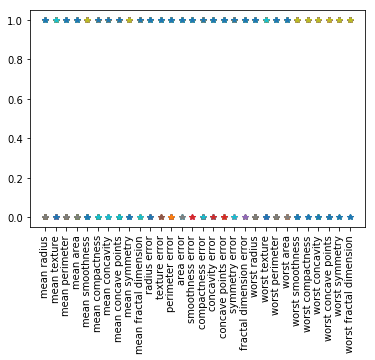

In [12]:
XBinTrain = XTrain.apply(pd.cut,bins=2,labels=[1,0]) #binarisation in onse step pandas function
XBinTest = XTest.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(XBinTest.T,'*')
plt.xticks(rotation='vertical')
plt.show()

#Convert pandas dataframe to np array

In [0]:
type(XBinTest)
XBinTrainNp = XBinTrain.values
XBinTestNp = XBinTest.values
YTestNp = YTest.values
YTrainNp = YTrain.values

#MP Nueron Model

In [14]:
from random import randint

b=3

i = randint(0,XBinTrainNp.shape[0])

if(np.sum(XBinTrainNp[i,:]) < b) :
  print('Inference is Benign')
else :
  print('Inference is Malignant')
  
print('Sum is ',np.sum(XBinTrainNp[i,:]))
#print('Sum is ',np.sum(XBinTrainNp[i]))

  
if(YTrainNp[i] == 0) :
  print('Truth is Benign')
else :
  print('Truth is Malignant')

Inference is Malignant
Sum is  30
Truth is Malignant


In [15]:
b = 3
YPredTrain = []
AccNoRes = 0

for x,y in zip(XBinTrainNp,YTrainNp):
  YPred = (np.sum(x)>=b)
  YPredTrain.append(YPred)
  AccNoRes += (y==YPred)
  
print(AccNoRes,AccNoRes/YTrainNp.shape[0])


b = 3
for b in range(XBinTrainNp.shape[1]) :
 YPredTrain = []
 AccNoRes = 0

 for x,y in zip(XBinTrainNp,YTrainNp):
   YPred = (np.sum(x)>=b)
   YPredTrain.append(YPred)
   AccNoRes += (y==YPred)
  
 print('b is',b,' Accuracy',AccNoRes/YTrainNp.shape[0])

250 0.628140703517588
b is 0  Accuracy 0.628140703517588
b is 1  Accuracy 0.628140703517588
b is 2  Accuracy 0.628140703517588
b is 3  Accuracy 0.628140703517588
b is 4  Accuracy 0.628140703517588
b is 5  Accuracy 0.628140703517588
b is 6  Accuracy 0.628140703517588
b is 7  Accuracy 0.628140703517588
b is 8  Accuracy 0.628140703517588
b is 9  Accuracy 0.628140703517588
b is 10  Accuracy 0.628140703517588
b is 11  Accuracy 0.628140703517588
b is 12  Accuracy 0.628140703517588
b is 13  Accuracy 0.6306532663316583
b is 14  Accuracy 0.6407035175879398
b is 15  Accuracy 0.6457286432160804
b is 16  Accuracy 0.6532663316582915
b is 17  Accuracy 0.6608040201005025
b is 18  Accuracy 0.6683417085427136
b is 19  Accuracy 0.6758793969849246
b is 20  Accuracy 0.6809045226130653
b is 21  Accuracy 0.7010050251256281
b is 22  Accuracy 0.7236180904522613
b is 23  Accuracy 0.7462311557788944
b is 24  Accuracy 0.7839195979899497
b is 25  Accuracy 0.8090452261306532
b is 26  Accuracy 0.8241206030150754
b 

In [16]:
b = 3
YPredTrain = []
AccNoRes = 0

for x,y in zip(XBinTrainNp,YTrainNp):
  YPred = (np.sum(x)>=b)
  YPredTrain.append(YPred)
  AccNoRes += (y==YPred)
  
print(AccNoRes,AccNoRes/YTrainNp.shape[0])


b = 3
for b in range(XBinTrainNp.shape[1]) :
 YPredTrain = []
 AccNoRes = 0

 for x,y in zip(XBinTrainNp,YTrainNp):
   YPred = (np.sum(x)>=b)
   YPredTrain.append(YPred)
   AccNoRes += (y==YPred)
  
 print('b is',b,' Accuracy',AccNoRes/YTrainNp.shape[0])

250 0.628140703517588
b is 0  Accuracy 0.628140703517588
b is 1  Accuracy 0.628140703517588
b is 2  Accuracy 0.628140703517588
b is 3  Accuracy 0.628140703517588
b is 4  Accuracy 0.628140703517588
b is 5  Accuracy 0.628140703517588
b is 6  Accuracy 0.628140703517588
b is 7  Accuracy 0.628140703517588
b is 8  Accuracy 0.628140703517588
b is 9  Accuracy 0.628140703517588
b is 10  Accuracy 0.628140703517588
b is 11  Accuracy 0.628140703517588
b is 12  Accuracy 0.628140703517588
b is 13  Accuracy 0.6306532663316583
b is 14  Accuracy 0.6407035175879398
b is 15  Accuracy 0.6457286432160804
b is 16  Accuracy 0.6532663316582915
b is 17  Accuracy 0.6608040201005025
b is 18  Accuracy 0.6683417085427136
b is 19  Accuracy 0.6758793969849246
b is 20  Accuracy 0.6809045226130653
b is 21  Accuracy 0.7010050251256281
b is 22  Accuracy 0.7236180904522613
b is 23  Accuracy 0.7462311557788944
b is 24  Accuracy 0.7839195979899497
b is 25  Accuracy 0.8090452261306532
b is 26  Accuracy 0.8241206030150754
b 

In [0]:
from sklearn.metrics import accuracy_score

In [18]:
b = 27
YPredTest = []
print(XBinTrainNp.shape)
for x in XBinTestNp :
  #print(x.shape)
  #print('sum is : ',np.sum(x))
  YPred = (np.sum(x)>=b)
  YPredTest.append(YPred)
  
Accuracy = accuracy_score(YPredTest,YTestNp)
print('b is',b,' Accuracy',Accuracy)
#print(YTestNp,YPredTest)

(398, 30)
b is 27  Accuracy 0.8947368421052632


#MP Nueron Class

In [19]:
class MPNueron :
  def __init__(self) :
    self.b = None
  
  def model(self, x) :
    return (sum(x) >= self.b)
  
  def predict(self, X) :
    Y = []
    for x in X:
      res =self.model(x)
      Y.append(res)
    return np.array(Y)
  
  def fit(self,X,Y):
    accuracy = {}
    for b in range(X.shape[1]+1) :
      self.b = b
      YPred = self.predict(X)
      accuracy[b] = accuracy_score(YPred, Y)
      #print(b,accuracy[b])
      
    best_b = max(accuracy,key = accuracy.get)
    self.b = best_b
    print('B is ',best_b)
    print('Acuuracy is ',accuracy[best_b])
    
    
mpn = MPNueron()
mpn.fit(XBinTrainNp,YTrainNp)
YPred = mpn.predict(XBinTestNp)
acc = accuracy_score(YPred,YTestNp)
print(acc)

B is  27
Acuuracy is  0.8517587939698492
0.8947368421052632


#Perceptron Class

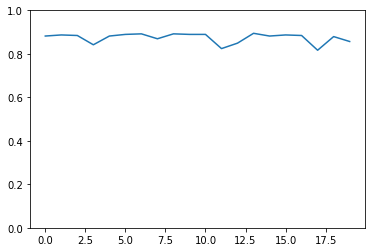

0.9239766081871345


In [53]:
class Perceptron:
  
  def __init__(self):
    self.w=None
    self.x=None
  
  def model(self,x) :
    return 1 if(np.dot(x,self.w) >= self.b) else 0
  
  def predict(self,X) :
    Y = []
    for x in X :
      Y.append(self.model(x))
    return np.array(Y)
  
  def fit(self,X,Y,e = 1, lr = 1):
    accuracy = {}
    MxAcc = 0
    self.w = np.ones(X.shape[1])
    self.b = 0
    for i in range(e):
      for x,y in zip(X,Y):
        YPred = self.model(x)
        
        if (YPred == 0 and y ==1) :
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif (YPred == 1 and y == 0) :
          self.w = self.w - lr * x
          self.b = self.b - lr * 1
      accuracy[i] = accuracy_score(self.predict(X),Y)
      if(accuracy[i] > MxAcc) :
        MxAcc = accuracy[i]
        ChkW = self.w
        ChkB = self.b
    self.w = ChkW
    self.b = ChkB
    plt.plot(accuracy.values())
    plt.ylim([0,1])
    plt.show()
          
          
PObj = Perceptron()
XTrainNp = XTrain.values
XTestNp = XTest.values
YTrainNp = YTrain.values
YTestNp = YTest.values
PObj.fit(XTrainNp,YTrainNp,20,.0001)
YPred = PObj.predict(XTestNp)
print(accuracy_score(YPred,YTestNp))
    
